In [10]:
import pandas as pd
import altair as alt
from IPython.display import Image

# Task 1

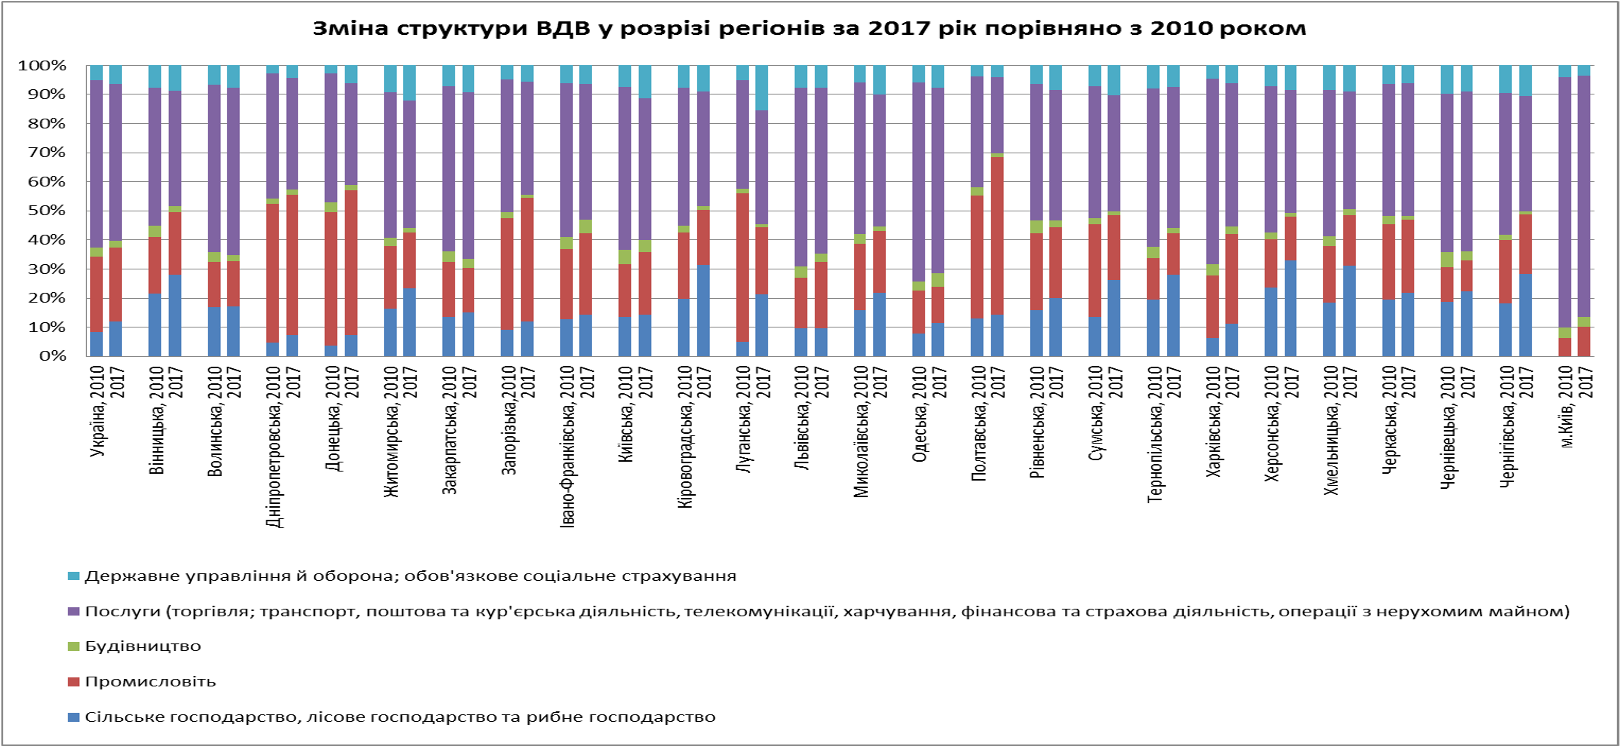

In [12]:
Image("Picture1.png")

### Проблеми

На цьому графіку використано згруповані стовпчикові графіки, а саме Layered bar chart.

Основна проблема цієї візуалізації є те, що тут забагато даних. Користувач має аж три задачі: порівняти значення за 2010 і 2017 роки у одному регіону, порівняти значення регіону у 2010 з іншими регіонами у 2010, а також також регіон у 2017 році зі всіма іншими регіонами у 2017 році.

Ще однією проблемою є те, що зручно порівювати між собою лише ті сегменти, які знаходяться спочатку або наприкінці графіку, а сегменти, які знаходяться всередині графіку, порівнювати між собою майже неможливо, оскільки вони мають різні точки відліку.

А ще важко читаються підписи вертикальних стовпчиків


# Task 2

In [2]:
df = pd.read_excel("1.4_02.xlsx", engine='openpyxl')
df.head()

,"Регіон, рік",сільське господарство,промисловість,будівництво,послуги,державне управління
0,"Україна, 2010",8.3,25.9,3.3,57.3,5.2
1,"Україна, 2017",12.1,25.2,2.5,53.7,6.5
2,"Вінницька, 2010",21.6,19.3,4.1,47.4,7.6
3,"Вінницька, 2017",28.1,21.4,2.0,39.8,8.7
4,"Волинська, 2010",16.9,15.6,3.2,57.7,6.6


In [3]:
df[['Регіон', 'Рік']] = df['Регіон, рік'].str.split(',', 1, expand=True)
df.drop('Регіон, рік', axis=1, inplace=True)

In [4]:
df.head()

,сільське господарство,промисловість,будівництво,послуги,державне управління,Регіон,Рік
0,8.3,25.9,3.3,57.3,5.2,Україна,2010
1,12.1,25.2,2.5,53.7,6.5,Україна,2017
2,21.6,19.3,4.1,47.4,7.6,Вінницька,2010
3,28.1,21.4,2.0,39.8,8.7,Вінницька,2017
4,16.9,15.6,3.2,57.7,6.6,Волинська,2010


In [15]:
dropdown = alt.binding_select(options = df['Регіон'].unique())
select_region = alt.selection_single(empty = 'none', bind = dropdown, fields = ['Регіон'], init={'Регіон': 'Вінницька'}, name="Region")


alt.Chart(df).mark_bar().transform_fold(
      ['сільське господарство', 'промисловість', 'будівництво', 'послуги', 'державне управління'],
      as_=['column', 'value']
    ).encode(
        alt.X('value:Q', title='Структура ВДВ'),
        alt.Y('Рік'),
        color='column:N',
        tooltip=[alt.Tooltip('column:N'),
                 alt.Tooltip('value:N')],
).properties(width = 800, height = 400, title='Зміна структури ВДВ за 2017 рік порівняно з 2010 роком').add_selection(select_region).transform_filter(select_region)



alt.Chart(...)

## Рішення

Альтернативна візуалізація складається з горизонтального Layer bar chart. 
На мою думку, порівнювати значення таким способом є легше.

Я вирішила показувати на графіку лише один регіон, щоб було легше порівнювати значення за 2010 і 2017 роки. Звичайно такий спосіб унеможливлює порівняння різних регіонів за різні роки між собою, але, на мою думку, тут важливіше порівнювати дані у одному регіоні у різний час.

Проте ця візуалізація має один недолік: незручно порівнювати сегменти, які знаходяться всередині бару. Щоб вирішити це, я додала tooltip зі значенням для кожного сегменту.